In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [110]:
df = pd.read_csv("Survey1.csv")

In [111]:
df.head()

,Timestamp,Name,Gender,Age,How much time do you spend working on a computer daily?,How often do you keep a check on your posture while working on a computer?,"How crucial do you consider maintaining proper posture to be, on a scale of 1 to 10?"
0,4/18/2024 10:47:49,Aman Jain,Male,17-24 Yrs,3-6 Hrs,"Once in a while, when I remember 🤔 Occasionally",8
1,4/18/2024 11:20:44,Daksh Rohilla,Male,17-24 Yrs,3-6 Hrs,"Rarely, but I should! 😅",10
2,4/18/2024 11:21:22,Yash Malik,Male,17-24 Yrs,6-9 Hrs,"Pretty often, gotta stay comfy! 💼 Frequently",9
3,4/18/2024 11:21:41,Aryan Raina,Male,17-24 Yrs,6-9 Hrs,"Oops, never really thought about it! 🙈 Never",10
4,4/18/2024 11:22:12,Surbhi Jain,Female,25-35 Yrs,6-9 Hrs,"Rarely, but I should! 😅",9


In [112]:
df.drop(columns=["Timestamp", "Name", ], inplace=True)

In [113]:
df.head()

,Gender,Age,How much time do you spend working on a computer daily?,How often do you keep a check on your posture while working on a computer?,"How crucial do you consider maintaining proper posture to be, on a scale of 1 to 10?"
0,Male,17-24 Yrs,3-6 Hrs,"Once in a while, when I remember 🤔 Occasionally",8
1,Male,17-24 Yrs,3-6 Hrs,"Rarely, but I should! 😅",10
2,Male,17-24 Yrs,6-9 Hrs,"Pretty often, gotta stay comfy! 💼 Frequently",9
3,Male,17-24 Yrs,6-9 Hrs,"Oops, never really thought about it! 🙈 Never",10
4,Female,25-35 Yrs,6-9 Hrs,"Rarely, but I should! 😅",9


In [114]:
df.rename(columns={"How much time do you spend working on a computer daily?" : "TimeSpent", "How often do you keep a check on your posture while working on a computer?" : "CheckPosture", "How crucial do you consider maintaining proper posture to be, on a scale of 1 to 10?" : "NeedOfPG"}, inplace=True)

In [115]:
df.head()

,Gender,Age,TimeSpent,CheckPosture,NeedOfPG
0,Male,17-24 Yrs,3-6 Hrs,"Once in a while, when I remember 🤔 Occasionally",8
1,Male,17-24 Yrs,3-6 Hrs,"Rarely, but I should! 😅",10
2,Male,17-24 Yrs,6-9 Hrs,"Pretty often, gotta stay comfy! 💼 Frequently",9
3,Male,17-24 Yrs,6-9 Hrs,"Oops, never really thought about it! 🙈 Never",10
4,Female,25-35 Yrs,6-9 Hrs,"Rarely, but I should! 😅",9


In [116]:
df["CheckPosture"].unique()

array(['Once in a while, when I remember 🤔 Occasionally',
       'Rarely, but I should! 😅',
       'Pretty often, gotta stay comfy! 💼 Frequently',
       'Oops, never really thought about it! 🙈 Never',
       'Like a posture pro! 🌟 Always'], dtype=object)

In [117]:
PostureCheck = {'Once in a while, when I remember 🤔 Occasionally' : 'Occasionally',
       'Rarely, but I should! 😅' : 'Rarely',
       'Pretty often, gotta stay comfy! 💼 Frequently' : 'Frequently',
       'Oops, never really thought about it! 🙈 Never' : 'Never',
       'Like a posture pro! 🌟 Always' : 'Always'}

In [118]:
for index in df.index:
    df["CheckPosture"][index] = PostureCheck[df["CheckPosture"][index]]
    if df["NeedOfPG"][index] >= 5:
        df["NeedOfPG"][index] = "Needed"
    else:
        df["NeedOfPG"][index] = "Not Needed"

C:\Users\amanj\AppData\Local\Temp\ipykernel_14828\4249797256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CheckPosture"][index] = PostureCheck[df["CheckPosture"][index]]
C:\Users\amanj\AppData\Local\Temp\ipykernel_14828\4249797256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NeedOfPG"][index] = "Needed"
C:\Users\amanj\AppData\Local\Temp\ipykernel_14828\4249797256.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Needed' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df["NeedOfPG"][in

In [119]:
df.head()

,Gender,Age,TimeSpent,CheckPosture,NeedOfPG
0,Male,17-24 Yrs,3-6 Hrs,Occasionally,Needed
1,Male,17-24 Yrs,3-6 Hrs,Rarely,Needed
2,Male,17-24 Yrs,6-9 Hrs,Frequently,Needed
3,Male,17-24 Yrs,6-9 Hrs,Never,Needed
4,Female,25-35 Yrs,6-9 Hrs,Rarely,Needed


In [120]:
TimeSpent = df["TimeSpent"].unique()
CheckPosture = df["CheckPosture"].unique()
NeedOfPG = df["NeedOfPG"].unique()

In [121]:
TimeSpent = sorted(TimeSpent)
TimeSpent

['1-3 Hrs', '10+ Hrs', '3-6 Hrs', '6-9 Hrs']

In [122]:
CountTS = []
for a in TimeSpent:
    count = df[df["TimeSpent"]==a].shape[0]
    CountTS.append(count)
CountTS = [(count / df.shape[0]) * 100 for count in CountTS]

In [123]:
CountCP = []
for a in CheckPosture:
    count = df[df["CheckPosture"]==a].shape[0]
    CountCP.append(count)
CountCP = [(count / df.shape[0]) * 100 for count in CountCP]

In [124]:
CountNeed = []
for a in NeedOfPG:
    count = df[df["NeedOfPG"]==a].shape[0]
    CountNeed.append(count)
CountNeed = [(count / df.shape[0]) * 100 for count in CountNeed]

Text(0.5, 1.0, 'HoursPerDay v/s PercentageOfUsers')

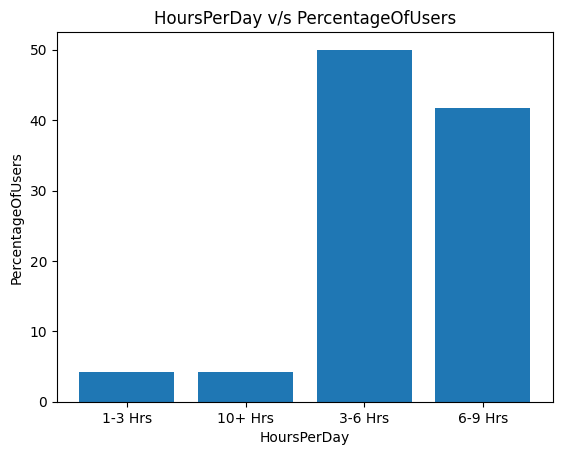

In [125]:
plt.bar(TimeSpent, CountTS)
plt.xlabel("HoursPerDay")
plt.ylabel("PercentageOfUsers")
plt.title("HoursPerDay v/s PercentageOfUsers")

Text(0.5, 1.0, 'UserChecksPosture v/s PercentageOfUsers')

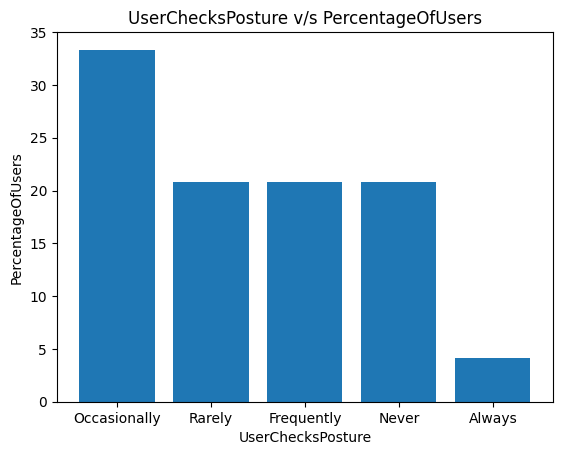

In [126]:
plt.bar(CheckPosture, CountCP)
plt.xlabel("UserChecksPosture")
plt.ylabel("PercentageOfUsers")
plt.title("UserChecksPosture v/s PercentageOfUsers")

Text(0.5, 1.0, 'NeedPostureGuard v/s PercentageOfUsers')

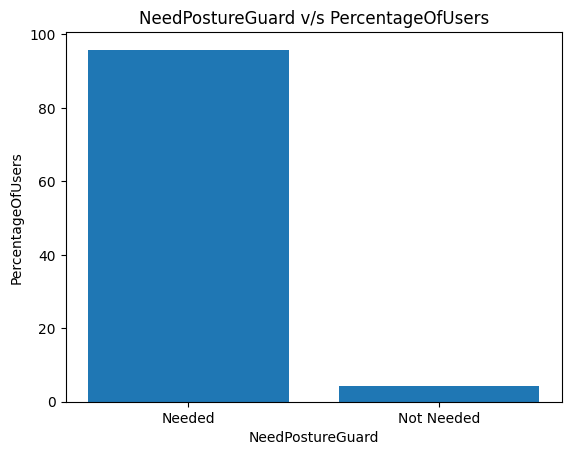

In [127]:
plt.bar(NeedOfPG, CountNeed)
plt.xlabel("NeedPostureGuard")
plt.ylabel("PercentageOfUsers")
plt.title("NeedPostureGuard v/s PercentageOfUsers")